In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("d:\Mc Donald's  Dataset\menu.csv")

In [3]:
data

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [5]:
data.shape
menu_category = data.Category.value_counts

In [6]:
plt.figure()
menu_category.plot.bar(color = ['red','pink','pink','pink','pink','pink','pink','pink','pink'])
plt.title("Number of Menu Items for each Food Category")
plt.ylabel("Count")
plt.xlabel("Menu Category")
plt.xticks(rotation=45)
plt.show()

AttributeError: 'function' object has no attribute 'plot'

<Figure size 640x480 with 0 Axes>

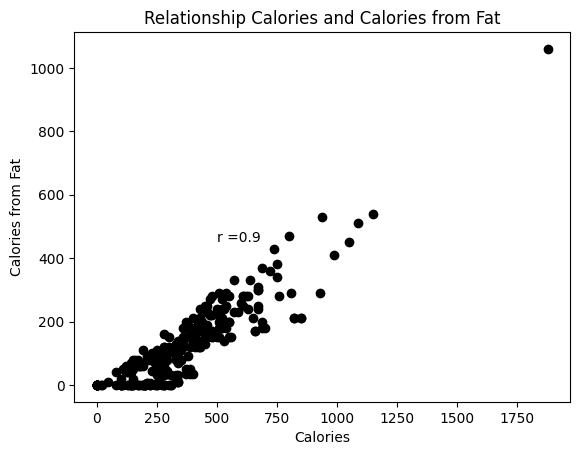

In [7]:
# Fats and Carbohydrates
plt.figure()
correlation = data["Calories"].corr(data['Calories from Fat'])
plt.scatter(data.Calories, data["Calories from Fat"],color = 'black')
plt.text(500,450, 'r ={}'.format(round(correlation,2)))
plt.xlabel("Calories")
plt.ylabel("Calories from Fat")
plt.title("Relationship Calories and Calories from Fat")
plt.show()

In [8]:
data.groupby('Category')['Trans Fat'].mean() 

Category
Beef & Pork           1.100000
Beverages             0.000000
Breakfast             0.107143
Chicken & Fish        0.129630
Coffee & Tea          0.142105
Desserts              0.000000
Salads                0.000000
Smoothies & Shakes    0.535714
Snacks & Sides        0.000000
Name: Trans Fat, dtype: float64

In [9]:
data['Saturated_cholesterol'] = round(data['Saturated Fat']/data["Cholesterol"]*100,2)
data['Saturated_cholesterol']

0       1.92
1      12.00
2      17.78
3       3.51
4      16.00
       ...  
255    20.00
256    21.82
257    20.00
258    25.00
259    26.67
Name: Saturated_cholesterol, Length: 260, dtype: float64

In [10]:
saturated_cholesterol = data.groupby('Category')['Saturated_cholesterol'].mean().dropna().nlargest()

In [11]:
saturated_cholesterol

Category
Coffee & Tea          14.930238
Smoothies & Shakes    14.633214
Beef & Pork           11.853333
Salads                 9.975000
Chicken & Fish         8.358519
Name: Saturated_cholesterol, dtype: float64

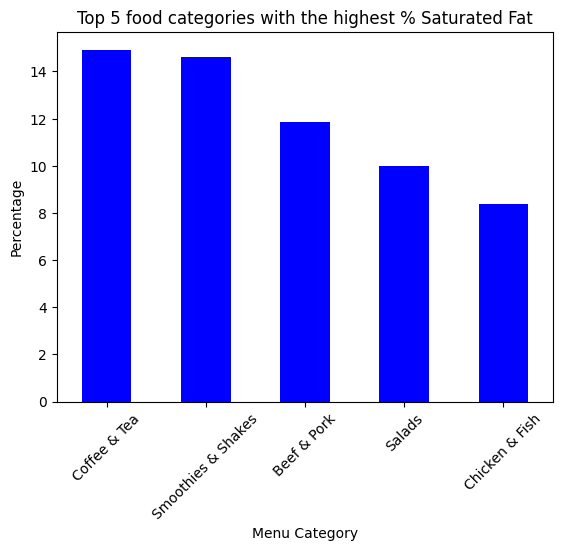

In [12]:
plt.figure()
saturated_cholesterol.sort_values(ascending=False).plot.bar(color = 'blue')
plt.title("Top 5 food categories with the highest % Saturated Fat")
plt.ylabel("Percentage")
plt.xlabel("Menu Category")
plt.xticks(rotation=45)
plt.show()

In [13]:
shakes = data[data.Category =='Smoothies & Shakes']

In [14]:
shakes.groupby('Item')['Saturated_cholesterol'].mean().sort_values()


Item
Blueberry Pomegranate Smoothie (Medium)               0.00
Blueberry Pomegranate Smoothie (Small)                0.00
Mango Pineapple Smoothie (Medium)                     0.00
Mango Pineapple Smoothie (Small)                      0.00
Strawberry Banana Smoothie (Small)                    0.00
Strawberry Banana Smoothie (Medium)                   0.00
Blueberry Pomegranate Smoothie (Large)               10.00
Mango Pineapple Smoothie (Large)                     10.00
Strawberry Banana Smoothie (Large)                   10.00
Chocolate Shake (Medium)                             16.00
Vanilla Shake (Medium)                               16.00
Shamrock Shake (Medium)                              16.00
Vanilla Shake (Large)                                16.67
Strawberry Shake (Small)                             16.67
Strawberry Shake (Large)                             16.67
Shamrock Shake (Large)                               16.67
Vanilla Shake (Small)                              

In [15]:
beef_pork = data[data.Category =="Beef & Pork"]

In [16]:
beef_pork.groupby("Item")["Saturated_cholesterol"].mean().sort_values()

Item
Hamburger                                    10.00
McDouble                                     10.67
Bacon McDouble                               11.11
Cheeseburger                                 11.11
Double Cheeseburger                          11.11
Daily Double                                 11.25
Jalapeño Double                              11.25
Big Mac                                      11.76
Double Quarter Pounder with Cheese           11.88
Quarter Pounder with Bacon & Cheese          12.38
Quarter Pounder with Bacon Habanero Ranch    12.38
Quarter Pounder with Cheese                  12.63
Quarter Pounder Deluxe                       12.94
Bacon Clubhouse Burger                       13.04
McRib                                        14.29
Name: Saturated_cholesterol, dtype: float64

In [17]:
salads = data[data.Category == 'Salads']
salads.groupby('Item')['Saturated_cholesterol'].mean().sort_values()

Item
Premium Southwest Salad with Grilled Chicken       3.57
Premium Bacon Ranch Salad with Grilled Chicken     4.71
Premium Bacon Ranch Salad with Crispy Chicken      8.57
Premium Southwest Salad with Crispy Chicken        9.00
Premium Bacon Ranch Salad (without Chicken)       14.00
Premium Southwest Salad (without Chicken)         20.00
Name: Saturated_cholesterol, dtype: float64

In [18]:
chicken_fish = data[data.Category == 'Chicken & Fish']
chicken_fish.groupby('Item')['Saturated_cholesterol'].mean().sort_values()

Item
Premium Grilled Chicken Classic Sandwich                 3.08
Premium McWrap Chicken Sweet Chili (Grilled Chicken)     4.62
Premium Grilled Chicken Ranch BLT Sandwich               5.00
Southern Style Crispy Chicken Sandwich                   6.67
Premium Grilled Chicken Club Sandwich                    6.67
Bacon Clubhouse Grilled Chicken Sandwich                 7.27
Premium McWrap Chicken & Bacon (Grilled Chicken)         7.37
Chicken McNuggets (20 piece)                             7.41
Premium McWrap Chicken & Ranch (Grilled Chicken)         7.50
Premium McWrap Southwest Chicken (Grilled Chicken)       7.50
Chicken McNuggets (6 piece)                              7.50
Chicken McNuggets (40 piece)                             7.55
Chicken McNuggets (10 piece)                             7.69
Premium Crispy Chicken Classic Sandwich                  7.78
Chicken McNuggets (4 piece)                              8.00
McChicken                                                8.57
Pre

In [19]:
data.groupby('Category')['Carbohydrates (% Daily Value)'].mean().sort_values()

Category
Salads                 7.166667
Beverages              9.592593
Snacks & Sides         9.615385
Desserts              11.571429
Beef & Pork           13.466667
Coffee & Tea          14.863158
Chicken & Fish        16.333333
Breakfast             16.571429
Smoothies & Shakes    30.142857
Name: Carbohydrates (% Daily Value), dtype: float64

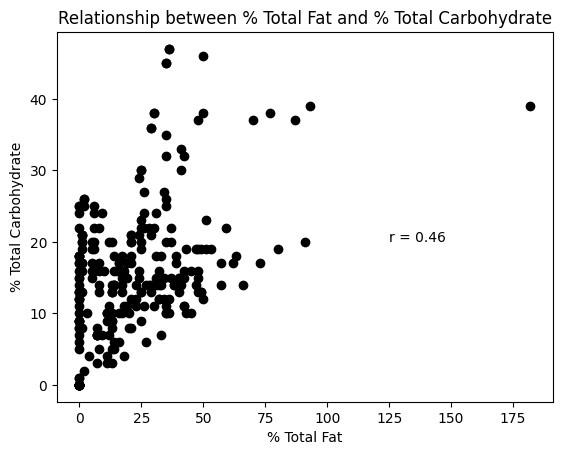

In [20]:
plt.figure()
plt.scatter(data['Total Fat (% Daily Value)'], data['Carbohydrates (% Daily Value)'], color='k')
correlation = data['Total Fat (% Daily Value)'].corr(data['Carbohydrates (% Daily Value)'])
plt.text(125,20,'r = {}'.format(round(correlation,2)))
plt.xlabel("% Total Fat")
plt.ylabel("% Total Carbohydrate")
plt.title("Relationship between % Total Fat and % Total Carbohydrate")
plt.show()

In [ ]:
# There is a strong relationship between Calories and Calories with fat. Hence, food items with high caloric content tend 
# to also have a high calories with fat content.
# Generally, McDonalds foods have low trans fat which is good.
# The Smoothies and Shakes Menu Category had the highest saturated fat content. Upon analysis, it was discovered that 
# while Fruit shakes had no saturated fat. However, milk Shakes, Chocolate Shakes, Shamrock and McFlurry shakes had high 
# saturated fat with McFlurry at the top of the list.
# Whereas ordinary tea & coffee have no saturated fat, drinks with mocha, latte and chocolate have a high saturated fat content.
# All the menus under Beef and Pork have a high %saturated fat content between 10% and 14%.
# According to Harvard School of Public Health, in an attempt to reduce fat, most food manufacturers replace it with 
# carbohydrate. In view of this, the analysis of the % Total Carbohydrate in Mcdonald's foods was analyzed and it was 
# discovered that on average, Mcdonald's foods are low carbs. Also, there is a weak relationship between carbohydrate and 
# fat in the food items

In [22]:
# Vitamin and Minerals
data.groupby('Category')['Vitamin A (% Daily Value)'].mean()

Category
Beef & Pork             6.933333
Beverages               0.740741
Breakfast               6.928571
Chicken & Fish         20.444444
Coffee & Tea           10.736842
Desserts                5.142857
Salads                146.666667
Smoothies & Shakes     18.750000
Snacks & Sides          4.846154
Name: Vitamin A (% Daily Value), dtype: float64

In [25]:
data.groupby('Category')['Vitamin C (% Daily Value)'].mean()

Category
Beef & Pork            7.333333
Beverages             23.481481
Breakfast              8.904762
Chicken & Fish        12.629630
Coffee & Tea           0.000000
Desserts               4.142857
Salads                28.333333
Smoothies & Shakes     6.964286
Snacks & Sides        28.153846
Name: Vitamin C (% Daily Value), dtype: float64

In [26]:
beverage = data[data.Category == 'Beverages']
beverage.groupby('Item')['Vitamin C (% Daily Value)'].mean().sort_values()

Item
Diet Dr Pepper (Small)                 0.0
Sprite (Large)                         0.0
Sprite (Child)                         0.0
Fat Free Chocolate Milk Jug            0.0
Dr Pepper (Small)                      0.0
Dr Pepper (Medium)                     0.0
Dr Pepper (Large)                      0.0
Dr Pepper (Child)                      0.0
Sprite (Medium)                        0.0
Diet Dr Pepper (Medium)                0.0
Diet Dr Pepper (Large)                 0.0
Sprite (Small)                         0.0
Diet Coke (Small)                      0.0
Diet Coke (Medium)                     0.0
Diet Coke (Large)                      0.0
Diet Coke (Child)                      0.0
Dasani Water Bottle                    0.0
Coca-Cola Classic (Small)              0.0
Coca-Cola Classic (Medium)             0.0
Coca-Cola Classic (Large)              0.0
Coca-Cola Classic (Child)              0.0
Diet Dr Pepper (Child)                 0.0
1% Low Fat Milk Jug                    4.0
Minute